In [1]:
###                              Theoretical ONLY    

In [153]:
import numpy as np
import math
import matplotlib.pyplot as plt
G = 6.6726e-11   #Grav constant
dt= 50  #timestep size
n= 4800000  # *based on theorteical transfer time and dt=200 111500
i=0 #for the loop later
PI=np.pi
#n=223000
#dt=100

In [154]:
class Planet:
    def __init__(self, name, mass, dist, radius, period,theta):
        self.name=name
        self.mass=mass
        self.dist=dist
        self.radius=radius
        self.period=period
        self.theta=theta  #
        self.pos=self.dist*np.array([np.cos(2*PI*dt*i/self.period+theta),np.sin(2*PI*dt*i/self.period+theta)])
        #angular offset based on 28/07/2022   https://www.theplanetstoday.com/


In [155]:
class Satellite:
    def __init__(self, name, mass, pos):
        self.name=name
        self.mass=mass
        self.pos=pos
        self.vel=np.array([0,0])


In [156]:
def toUnit(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
       return v
    return v / norm

def grav(pos, m1,m2,m3): #m1 is sun, m2 earth, m3 mars, m4 venus
    acc=np.array([0.0,0.0])
    r1=m1.pos-pos
    r2=m2.pos-pos
    r3=m3.pos-pos
    magr1=np.linalg.norm(r1)
    magr2=np.linalg.norm(r2)
    magr3=np.linalg.norm(r3)
    r11=toUnit(r1)
    r21=toUnit(r2)
    r31=toUnit(r3)
    acc1_mag= G*m1.mass/(magr1*magr1)
    acc2_mag= G*m2.mass/(magr2*magr2)
    acc3_mag= G*m3.mass/(magr3*magr3)
    acc[0]= acc1_mag*r11[0]+acc2_mag*r21[0]+acc3_mag*r31[0]
    acc[1]= acc1_mag*r11[1]+acc2_mag*r21[1]+acc3_mag*r31[1]
    return acc

def hamiltonian(fly, m1,m2,m3):
    ham=(np.linalg.norm(fly.vel))**2
    r1=m1.pos-fly.pos
    r2=m2.pos-fly.pos
    r3=np.pos-fly.pos
    magr1=np.linalg.norm(r1)
    magr2=np.linalg.norm(r2)
    magr3=np.linalg.norm(r3)
    ham=ham-G*((m1/magr1)+(m2/magr2)+(m3/magr3))
    return ham

def RK4_nbody(fly,m1,m2,m3,a):  #up to 4 bodies
    z1=fly.pos+(a/2)*fly.vel
    acc1=grav(fly.pos,m1,m2,m3) #need fly but with position z1
    v1=fly.vel+(a/2)*acc1
    z2=fly.pos+(a/2)*v1
    acc2=grav(z1,m1,m2,m3)   #need fly but with position z2
    v2=fly.vel+(a/2)*acc2
    z3=fly.pos+a*v2
    acc3=grav(z2,m1,m2,m3)
    v3=fly.vel+a*acc3
    fly.pos=fly.pos+(a/6)*(fly.vel+2*v1+2*v2+v3)
    acc4=grav(z3,m1,m2,m3)
    fly.vel= fly.vel+(a/6)*(acc1+2*acc2+2*acc3+acc4)
    
def boost(fly, v):
    fly.vel[0]+=v[0]
    fly.vel[1]+=v[1]

def KE_per_mass(fly):
    vv=np.linalg.norm(fly.vel)
    return 0.5*(vv**2)

def energy_correction(fly,m1,m2,m3,a):    #m1,m2,m3 are masses not accounted for in the vis-viva eqn and a is dt
    counter_acc=np.array([0.0,0.0])
    pos=fly.pos
    r1=m1.pos-pos
    r2=m2.pos-pos
    r3=m3.pos-pos
    magr1=np.linalg.norm(r1)
    magr2=np.linalg.norm(r2)
    magr3=np.linalg.norm(r3)
    acc1_mag= G*m1.mass/(magr1*magr1)
    acc2_mag= G*m2.mass/(magr2*magr2)
    acc3_mag= G*m3.mass/(magr3*magr3)
    counter_acc[0]= acc1_mag*r11[0]+acc2_mag*r21[0]+acc3_mag*r31[0]
    counter_acc[1]= acc1_mag*r11[1]+acc2_mag*r21[1]+acc3_mag*r31[1]
    distance_travelled=fly.vel*a
    net_counter_force_per_mass=np.linalg.norm(counter_acc)
    return net-counter_force_per_mass*distance_travelled

def epsilon(POS,SPEED,m1,m2,m3): #m1,m2,m3,m4 are sun,earth,mars,venus, k is i (which element of array pointer)
    EK=0.5*SPEED**2
    r1=m1.pos-POS
    r2=m2.pos-POS
    r3=m3.pos-POS
    magr1=np.linalg.norm(r1)
    magr2=np.linalg.norm(r2)
    magr3=np.linalg.norm(r3)
    ham=EK-G*((m1.mass/magr1)+(m2.mass/magr2)+(m3.mass/magr3))
    return ham

def g_factors(pos,m1):
    acc=np.array([0.0,0.0])
    r1=m1.pos-pos
    magr1=np.linalg.norm(r1)
    return G*m1.mass/(magr1*magr1)

In [157]:
#earth = Planet("earth", 5.9742e+24 , 147.92e+9,6371000,3.15e+7,0) #3.154e+7
#mars = Planet("mars", 6.39e+23, 218.49e+9, 3389500, 59.4e+6,0.7768775717671333)
#sun = Planet("sun", 1.99e+30, 0, 696340000, 31446925,0)
#venus = Planet("venus", 4.867e+24, 108.2e+9, 605200, 19440000,1.55334)

earth = Planet("earth", 0 , 149.6e+9,6371000,3.154e+7,0) #period 3.154e+7
mars = Planet("mars", 0, 227.94e+9, 3389500, 5.858e+7,0.7432802492995163)#theoretical angular offset0.749, period  59.4e+6
sun = Planet("sun", 1.99e+30, 0, 696340000, 31446925,0)
#0.775 mars too early
rocket = Satellite("rocket", 2.8e+6,np.array([earth.radius+earth.dist, 0]))
rocket_vel_at_pole=((earth.dist+earth.radius)/earth.period)*2*PI
rocket.vel[1]=(((earth.dist+earth.radius)/earth.period)+(earth.radius/86400))*2*PI


vsq=G*sun.mass*(2/(earth.radius+earth.dist)-2/(earth.dist+mars.dist))
burn11=np.sqrt(vsq)-np.linalg.norm(rocket.vel)

print(np.sqrt(vsq))
print(burn11)
print(np.sqrt(vsq)-rocket_vel_at_pole)

32736.83987955678
2470.839879556781
2933.2713276335708


In [158]:


#create the arrays to be exported
speed=np.array([np.linalg.norm(rocket.vel)])
MX=np.array(mars.pos[0])
MY=np.array(mars.pos[1])
EX=np.array(earth.pos[0])
EY=np.array(earth.pos[1])
RX=np.array(rocket.pos[0])
RY=np.array(rocket.pos[1])
hams=np.array([epsilon(rocket.pos,speed[0],sun,earth,mars)])
#----------------------

deltav1=np.array([0,burn11])
print(rocket.vel, deltav1)
rocket.vel[1]+=deltav1[1]
print(rocket.vel)

[    0 30266] [   0.         2470.83987956]
[    0 32736]


arrived
deltaV2: 2959.0376518569055 extra m/s


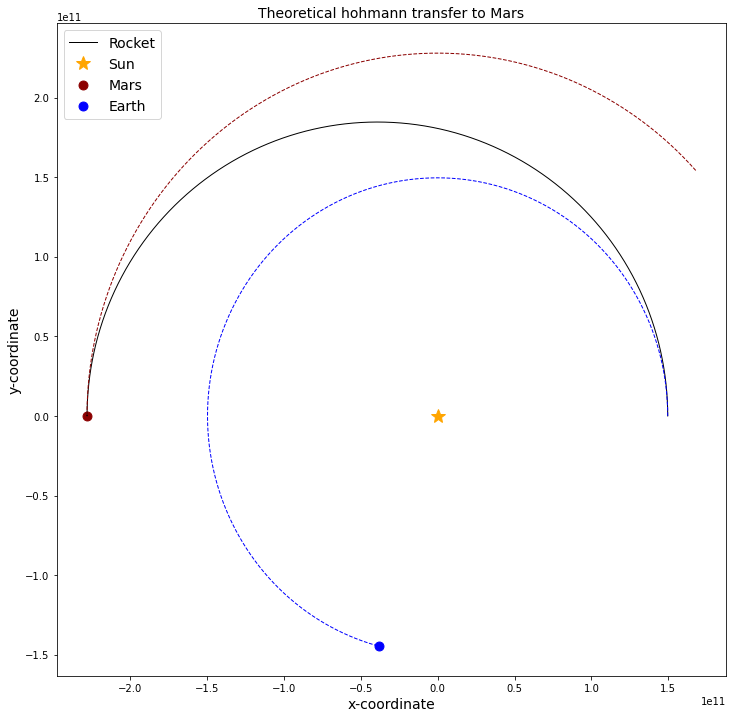

In [159]:
#Create figure
fig=plt.figure(figsize=(12,12))
#Create 3D axes
ax=fig.add_subplot(111)

#append all so they are all the same length in the end
MX=np.append(MX,mars.pos[0])
MY=np.append(MY,mars.pos[1])
EX=np.append(EX,earth.pos[0])
EY=np.append(EY,earth.pos[1])
RX=np.append(RX,rocket.pos[0])
RY=np.append(RY,rocket.pos[1])
speed=np.append(speed,np.linalg.norm(rocket.vel))
hams=np.append(hams,epsilon(rocket.pos,speed[1],sun,earth,mars))

#-----------------------
for i in range(0,n):
    earth.pos=earth.dist*np.array([np.cos(2*PI*dt*i/earth.period+earth.theta),np.sin(2*PI*dt*i/earth.period+earth.theta)])
    mars.pos=mars.dist*np.array([np.cos(2*PI*dt*i/mars.period+mars.theta),np.sin(2*PI*dt*i/mars.period+mars.theta)])
    #print(rocket.vel)
    RK4_nbody(rocket, sun, earth, mars, dt)
    
    #append all equally 
    
    RX=np.append(RX,rocket.pos[0])
    RY=np.append(RY,rocket.pos[1])
    MX=np.append(MX,mars.pos[0])
    MY=np.append(MY,mars.pos[1])
    EX=np.append(EX,earth.pos[0])
    EY=np.append(EY,earth.pos[1])
    speed=np.append(speed,np.linalg.norm(rocket.vel))
    hams=np.append(hams,epsilon(rocket.pos,speed[i+2],sun,earth,mars))
    
    #earth crash
    #if np.linalg.norm(rocket.pos-earth.pos)<earth.radius:
     #   print("early crash")
      #  break
    
    #mars landing
    dist=np.linalg.norm(rocket.pos)
    if mars.dist-dist<mars.radius:
        marsvel=np.array([0,-24448.433918035418])
        print("velocity before landing=", rocket.vel)
        burn2=marsvel-rocket.vel
        rocket.vel+=burn2
        burn2mag=np.linalg.norm(burn2)
        print("deltaV2:", burn2mag, "extra m/s")
        print("i=", i)
        if np.linalg.norm(mars.pos-rocket.pos)<mars.radius:
            print("perfect arrival")
            break
        else:
            print("Landing successfull")
            
            #append all so same lenght arrays "landing appends"
            RX=np.append(RX,MX[i])
            RY=np.append(RY,MY[i]-mars.radius)
            MX=np.append(MX,mars.pos[0])
            MY=np.append(MY,mars.pos[1])
            EX=np.append(EX,earth.pos[0])
            EY=np.append(EY,earth.pos[1])
            speed=np.append(speed,np.linalg.norm(rocket.vel))
            hams=np.append(hams,epsilon(rocket.pos,speed[i+3],sun,earth,mars))
            #landing complete, rocket matching martian velocity 
            break
    if rocket.pos[1] <0:
        print("arrived")
        marsvel=np.array([0,-24448.4])
        burn2=marsvel-rocket.vel
        burn2mag=np.linalg.norm(burn2)
        print("deltaV2:", burn2mag, "extra m/s")
        rocket.vel=marsvel
        
        RX=np.append(RX,mars.pos[0])
        RY=np.append(RY,mars.pos[1]+mars.radius)
        MX=np.append(MX,mars.pos[0])
        MY=np.append(MY,mars.pos[1])
        EX=np.append(EX,earth.pos[0])
        EY=np.append(EY,earth.pos[1])
        speed=np.append(speed,np.linalg.norm(rocket.vel))
        hams=np.append(hams,epsilon(rocket.pos,speed[i+3],sun,earth,mars))
        break
        
plt.plot(RX, RY,label='Rocket', color="black", linewidth=1)
ax.plot(MX,MY, color="darkred", linewidth=1, linestyle="dashed" )
ax.plot(EX,EY, color="blue", linewidth=1, linestyle="dashed" )
ax.plot(0,0,label='Sun', marker="*", markersize=15, color="orange", linewidth=0)
#plot the final positions
ax.scatter(MX[i],MY[i], label="Mars", color="darkred", marker="o",s=80)
ax.scatter(EX[i],EY[i], label='Earth', color="blue", marker="o",s=80)

ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_title("Theoretical hohmann transfer to Mars",fontsize=14)
ax.legend(loc="best",fontsize=14)

In [ ]:

dt 50.    2959.0374206055676
dt 100.   2959.037412029713
dt 200.   2959.037394405099
dt 500.   2959.037275417184

dt 50.     2959.0376518569055
dt 100.    2959.0376518563858
dt 200.    2959.037651855527
dt 500.    2959.0378908752737
dt 1000    2959.037890874544
dt 5000.   2959.044965374039
dt 10000.  2959.044965367993

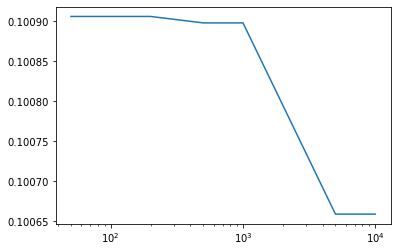

In [164]:
theory= 2962.0265096257644
dts=[50,100,200,500,1000,5000,10000]
ys=[2959.0376518569055,2959.0376518563858,2959.037651855527,2959.0378908752737,2959.037890874544,2959.044965374039,2959.044965367993]
YS=np.zeros(len(ys))
for i in range(0, len(ys)):
    YS[i]=(theory-ys[i])*100/theory
plt.semilogx(dts,YS)

In [47]:
a=(mars.dist+earth.dist)/2
v2sq=G*sun.mass*((2/mars.dist)-(1/a))
print(np.sqrt(v2sq))
mvel=2*PI*mars.dist/mars.period
print(mvel-np.sqrt(v2sq))

21486.373490374237
2962.060427661181


In [228]:
print(speed[len(speed)-1])
e1=0.5*(speed[len(speed)-2])**2
e2=0.5*(speed[len(speed)-1])**2
print((e1-e2)/1000000)

24448.4
-67.93099472794333


In [229]:
needed_velocity=32736
v_pole=((earth.dist+earth.radius)/earth.period)*2*PI
v_eq=(((earth.dist+earth.radius)/earth.period)+(earth.radius/86400))*2*PI
e_eq=0.5*v_eq**2
e_pole=0.5*v_pole**2
e_need=0.5*needed_velocity**2
boost_eq= e_need-e_eq
boost_pole=e_need-e_pole
print('boost1=', e_need-e_eq)
print('boost pole=', e_need-e_pole)

boost1= 77780812.94536752
boost pole= 91696498.78540695


energy difference= 13.91568584003943 Mj/kg


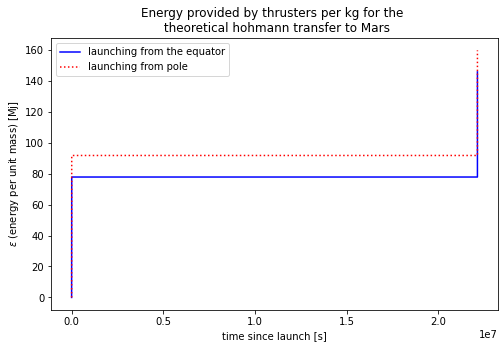

145.6808129453675
159.59649878540694


In [230]:
fig=plt.figure(figsize=(8,5))
dE2=67.9    #MJ
dE1=boost_eq/1000000     #MJ
dE1_pole=boost_pole/1000000
E=np.zeros(i)
E_pole=np.zeros(i)
X=np.zeros(i)
E[0]=0
X[0]=0
E_pole[0]=0
for k in range(1,i):
    E_pole[k]=dE1_pole
    E[k]=dE1
    X[k]=k*dt
E[i-1]=dE1+dE2
E_pole[i-1]=dE1_pole+dE2

print("energy difference=",E_pole[i-1]-E[i-1], "Mj/kg")

plt.plot(X,E, label='launching from the equator', color="blue")
plt.plot(X,E_pole, label='launching from pole', color="red", linestyle="dotted")
plt.title("Energy provided by thrusters per kg for the \n theoretical hohmann transfer to Mars")
plt.xlabel("time since launch [s]")
plt.ylabel("$\epsilon$ (energy per unit mass) [Mj]")
plt.legend(loc="best")
plt.show()
print(E[i-1])
print(E_pole[i-1])

In [231]:
print(130/116.5)

1.1158798283261802


In [272]:
np.savetxt('rocket_Xpos_dt200.txt', RX)
np.savetxt('rocket_Ypos_dt200.txt', RY)
np.savetxt('rocket_speed_dt200.txt', speed)
np.savetxt('mars_Xpos_dt200.txt', MX)
np.savetxt('mars_Ypos_dt200.txt',MY)
np.savetxt('earth_Xpos_dt200.txt', EX)
np.savetxt('earth_Ypos_dt200.txt', EY)
np.savetxt('hamiltonian_dt200.txt',hams)

In [160]:
print(len(hams))

111539


In [162]:
print(len(RX))

111539


In [37]:
print(len(RX),len(RY))
print(len(MX),len(MY))
print(len(EX),len(EY))
print(len(speed))
print(len(hams))

105652 105652
105652 105652
105652 105652
105652
105652


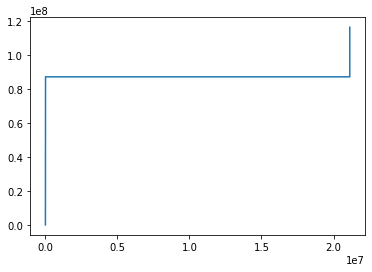

In [40]:
timen=np.zeros(len(hams))
e0=hams[0]
plothams=np.zeros(len(hams))
for i in range(0,len(hams)):
    timen[i]=dt*i
    plothams[i]=hams[i]-hams[0]
plt.plot(timen,plothams)

In [21]:
print(speed[0],speed[1])

29932.0 32719.0


In [22]:
print(speed[105650],speed[105651])

22152.80693852075 23434.8


In [23]:
vsq=G*sun.mass*((2/earth.dist)-(2/(earth.dist+mars.dist)))
print(np.sqrt(vsq))

32719.58268669747


In [24]:
print(len(speed))
print(speed[105650])

105652
22152.80693852075


In [25]:
print(23434.843935911023-22151.497418720723)

1283.3465171903008


In [14]:
g_at_mars_from_sun=G*sun.mass/(mars.dist**2)
g_at_mars_from_mars=G*6.39e+23/(mars.radius**2)
print(g_at_mars_from_sun)
print(g_at_mars_from_mars)

0.0027815382610590625
3.7112881317552593


In [34]:
print(0.5*speed[105651]**2-0.5*speed[105650]**2)

29221497.89231345
